Importer les données situées à l'adresse suivante:   
https://raw.githubusercontent.com/briatte/aad/master/reinhart-rogoff/debt.csv

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
sns.set()

In [126]:
df_debt = pd.read_csv("https://raw.githubusercontent.com/briatte/aad/master/reinhart-rogoff/debt.csv")
df_debt.head()

,Unnamed: 0,Country,Year,growth,ratio
0,147,Australia,1946,-3.557951,190.419080
1,148,Australia,1947,2.459475,177.321371
2,149,Australia,1948,6.437534,148.929811
3,150,Australia,1949,6.611994,125.828699
4,151,Australia,1950,6.920201,109.809398


Faire les vérifications d'usage (taille des données, nombre de valeurs manquantes, type des variables)

In [127]:
df_debt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1171 non-null   int64  
 1   Country     1171 non-null   object 
 2   Year        1171 non-null   int64  
 3   growth      1171 non-null   float64
 4   ratio       1171 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 45.9+ KB


In [128]:
df_debt.drop(columns=['Unnamed: 0'], inplace=True)
df_debt.head()

,Country,Year,growth,ratio
0,Australia,1946,-3.557951,190.419080
1,Australia,1947,2.459475,177.321371
2,Australia,1948,6.437534,148.929811
3,Australia,1949,6.611994,125.828699
4,Australia,1950,6.920201,109.809398


Faire une représentation graphique de la croissance en fonction du ratio dette/PIB.

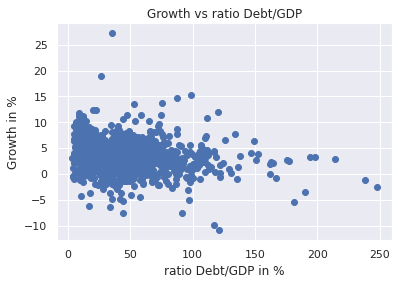

In [131]:
_ = plt.plot(df_debt.ratio, df_debt.growth,  marker='o', linestyle = 'None')
_ = plt.xlabel('ratio Debt/GDP in %')
_ = plt.ylabel('Growth in %')
_ = plt.title('Growth vs ratio Debt/GDP')
plt.show()

Choisir 5 pays, faire un scattter plot qui représente la croissance en fonction du ratio et colorer les points par pays.

In [132]:
df_debt.Country.unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Japan',
       'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Spain',
       'Sweden', 'UK', 'US'], dtype=object)

In [0]:
countries_to_keep = ['Austria', 'France', 'Canada', 'UK', 'US']
colors = ['b', 'r', 'g', 'c', 'm']

In [136]:
for ctry, col, ctry2 in zip(countries_to_keep, colors, countries_to_keep):
  print(ctry, col, ctry2)

Austria b Austria
France r France
Canada g Canada
UK c UK
US m US


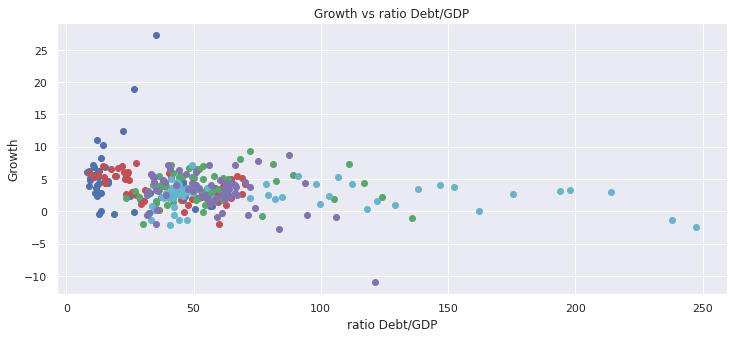

In [134]:
plt.figure(figsize =(12,5))

for ctry, col in zip(countries_to_keep, colors):
  plt.plot(df_debt[df_debt['Country'] == ctry].ratio, df_debt[df_debt['Country'] == ctry].growth, color=col, marker='o', linestyle = 'None')

_ = plt.xlabel('ratio Debt/GDP')
_ = plt.ylabel('Growth')
_ = plt.title('Growth vs ratio Debt/GDP')
plt.show()

Réaliser un box plot de la croissance pour ces 5 pays.

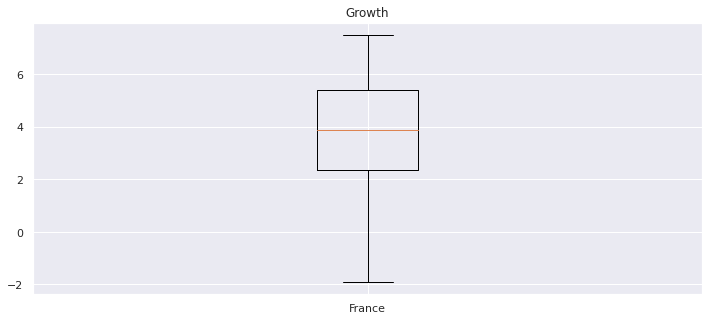

In [0]:
plt.figure(figsize =(12,5))

_ = plt.boxplot(df_debt[df_debt['Country']=='France'].growth, labels=['France'])
_ = plt.title("Growth")
plt.show()

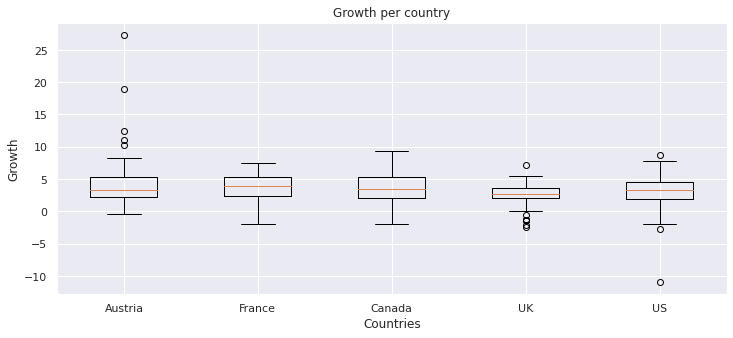

In [0]:
donnees_a_representer = []
for ctry in countries_to_keep:
  donnees_a_representer.append((df_debt[df_debt['Country']==ctry].growth).tolist())

plt.figure(figsize =(12,5))
plt.boxplot(donnees_a_representer, labels=countries_to_keep)
_ = plt.xlabel('Countries')
_ = plt.ylabel('Growth')
_ = plt.title('Growth per country')
plt.show()

A l'aide numpy réaliser une régression linéaire avec la croissance en y (variable expliquée) et le ratio en x (variable explicative).   
Représenter la droite de régression sur le graphique.

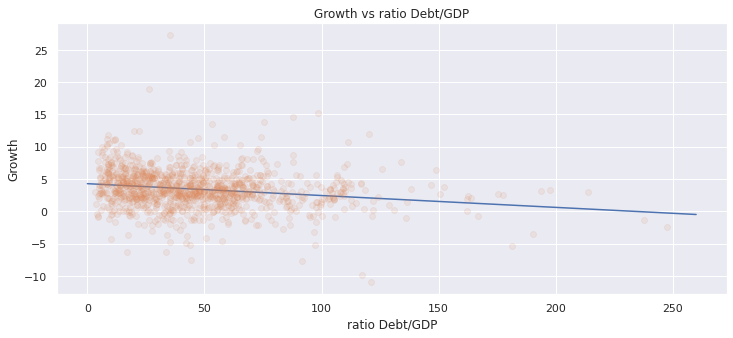

In [139]:
a,b = np.polyfit(df_debt.ratio, df_debt.growth, deg=1)

Xs = np.array([0, 260])
Ys = a*Xs + b

plt.figure(figsize =(12,5))

_ = plt.plot(Xs, Ys)
_ = plt.plot(df_debt.ratio, df_debt.growth,  marker='o', linestyle = 'None', alpha = 0.1)
_ = plt.xlabel('ratio Debt/GDP')
_ = plt.ylabel('Growth')
_ = plt.title('Growth vs ratio Debt/GDP')
plt.show()

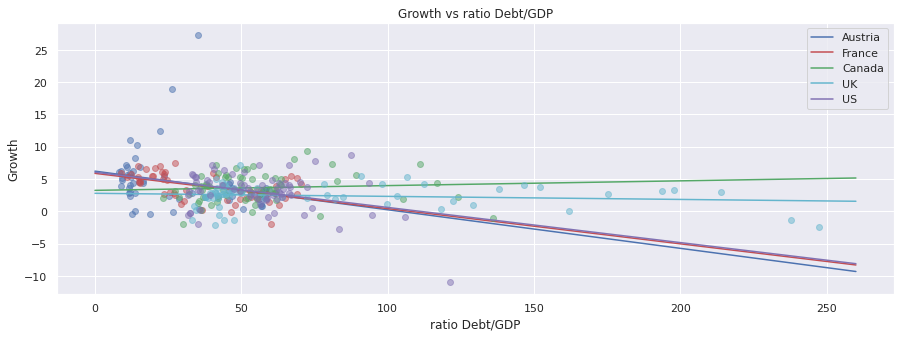

In [123]:
Xs = np.array([0, 260])
plt.figure(figsize =(15,5))

for ctry, col in zip(countries_to_keep, colors):
  #régressions
  a,b = np.polyfit(df_debt[df_debt['Country']==ctry].ratio, df_debt[df_debt['Country']==ctry].growth, deg=1)
  Ys = a*Xs + b
  #tracés
  plt.plot(Xs, Ys, color=col, label = str(ctry))
  plt.plot(df_debt[df_debt['Country'] == ctry].ratio, df_debt[df_debt['Country'] == ctry].growth, color=col, marker='o', linestyle = 'None', alpha=0.5)
  plt.legend(loc='upper right')

plt.xlabel('ratio Debt/GDP')
plt.ylabel('Growth')
plt.title('Growth vs ratio Debt/GDP')
plt.show()

In [0]:
countries_to_plot = ['UK', 'US', 'Japan', 'Spain']

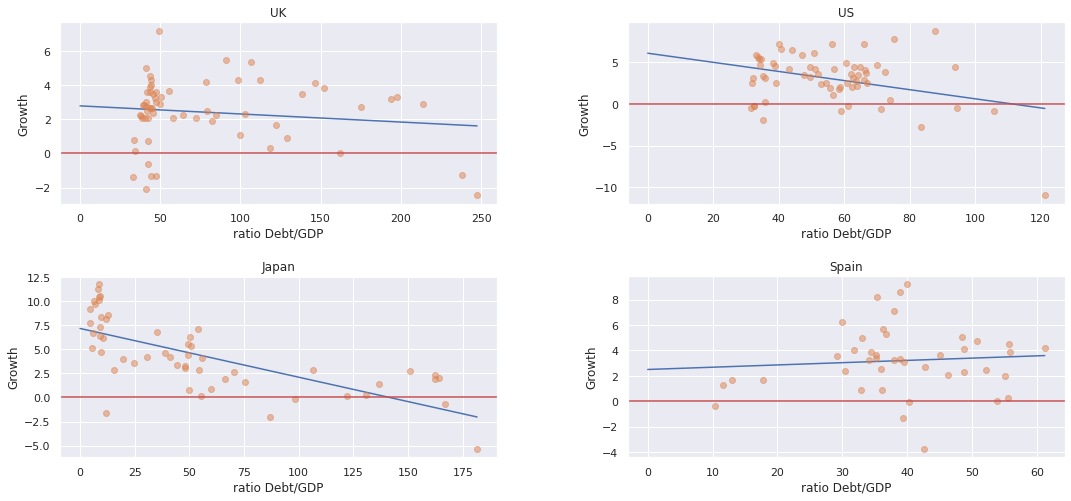

In [140]:
fig, axs = plt.subplots(2,2, figsize=(18, 8))
fig.subplots_adjust(hspace = 0.4, wspace=.3)
axs = axs.ravel()

for i, ctry in zip(range(4),countries_to_plot):

  # regressions
  Xs = np.array([0, df_debt[df_debt['Country']==ctry].ratio.max()])
  a,b = np.polyfit(df_debt[df_debt['Country']==ctry].ratio, df_debt[df_debt['Country']==ctry].growth, deg=1)
  Ys = a*Xs + b

  # tracés
  axs[i].plot(Xs, Ys)
  axs[i].plot(df_debt[df_debt['Country'] == ctry].ratio, df_debt[df_debt['Country'] == ctry].growth, marker='o', linestyle = 'None', alpha=0.5)
  axs[i].axhline(y=0, xmin=0, xmax=250, color = ('r'))
  axs[i].set_title(str(ctry))
  axs[i].set_xlabel('ratio Debt/GDP')
  axs[i].set_ylabel('Growth')

*à regarder après le dojo*    
Si vous voulez en savoir plus allez-voir ici: https://youtu.be/yeX_Zs7zztY